# Homework 3

**Due: 02/15/2018** (Thursday 15th February at 11:59pm).

## Instructions

+ In any case, develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - you can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope. 

+ The total homework points are 100. Please note that the problems are not weighed equally.

**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope. 

## Student details

+ **First Name:**Gourav
+ **Last Name:**Jhanwar
+ **Email:**gjhanwar@purdue.edu

## Readings

Before attempting the homework, it is probably a good idea to:
+ Read chapter 3 of Bishop (Pattern recognition and machine learning);
+ Review the slides of lectures 7, 8, & 9; and
+ Review the corresponding lecture handouts.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')
sns.set()
import scipy.stats as st
from sklearn.datasets import make_spd_matrix

# Problem 1

Suppose you conduct some experiments and collect a dataset of $N$ pairs of input and target variables, $\mathcal{D} = (x_{1:N}, y_{1:N})$, where $x_i \in \mathbb{R}$ and $y_i \in \mathbb{R}$, $\forall i$. 
Assume a Gaussian likelihood with the mean being a generalized linear model with weights $\mathbf{w}\in\mathbb{R}^m$ and basis functions $\boldsymbol{\phi}(x)\in\mathbb{R}^M$, and the noise variance being a constant $\sigma^2$.
On the weights, use an isotropic Gaussian prior, with precision parameter, $\alpha$.

1. Derive expressions for $\mathbf{m}_{N}$ and $\mathbf{S}_{N}$, the posterior mean and covariance of the model parameters respectively. Ask the question: What do I know about the weights given all the data I have seen? You will need Bayes rule for updating the weights and little bit of algebra. In particular, you will need a trick called "completing the square."

2. Use the results from part 1 to derive the posterior predictive distribution at an arbitrary test input $x^{*}$. Ask the question: What do I know about the $y^*$ at $x^*$ given all the data I have seen? You will need the sum rule of probability theory to connect this question to the likehood and the posterior you obtained in step 1.

3. Suppose now you perform an additional experiment and receive a data-point, $\mathcal{D}_{N+1}=(x_{N+1}, y_{N+1})$. Using the current posterior distribution over the parameters as the new prior, show that updating the model with the $(N+1)^{th}$ data-point results in the same posterior distribution shown above, with $N$ replaced by $N+1$.

The required expressions for all  of the above cases are well-known in closed form. It is, however, useful to work through the algebra atleast once. Feel free to consult Bishop's book, but in the end present your own derivation from scratch.

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br>

# Problem 2

[Conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior) are an extremely useful tool in Bayesian inference.
If the posterior distribution over the unknown parameters, $\boldsymbol{\theta}$, of a statistical model is in the same family  of distributions as the prior, the prior  is said to be conjugate to the chosen likelihood. We saw one such example in class where a Gaussian prior over the unknown weights of the linear regression model lead to a Gaussian posterior under the Gaussian likelihood model. We used a fixed value of $\sigma^2$ in our analysis of the linear regression model in class.

As before, consider a Gaussian likelihood with the mean being a generalized linear model with weights $\mathbf{w}\in\mathbb{R}^m$ and basis functions $\boldsymbol{\phi}(x)\in\mathbb{R}^M$, and the noise variance being a constant $\sigma^2$
Let's treat the noise parameter also as an unknown. Let $\beta$ be the inverse noise variance, i.e., $\beta = \frac{1}{\sigma^2}$ $^{(1)}$. 
Show that the following prior over $w$ and $\beta$:
$$
p(\mathbf{w}, \beta) = \mathcal{N}(\mathbf{w}|0, \alpha^{-1}\mathbf{I}) \mathrm{Gamma}(\beta| a_0, b_0),
$$
is conjugate.
That is, show that the posterior over $\mathbf{w}$ and $\beta$ has the same form as the prior: 
$$p(\mathbf{w}, \beta|\mathcal{D}_N, \alpha) = \mathcal{N}(w|\mathbf{m}_N, \mathbf{S}_N) \mathrm{Gamma}(\beta| a_N, b_N).$$
In doing so, recover the expressions for $\mathbf{m}_N$, $\mathbf{S}_N$, $a_N$ and $b_N$. Discuss any interesting observation you make about the form of the posterior distribution parameters.

The [Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) has probability density:
$$
\mathrm{Gamma}(\beta|a_0, b_0) = \frac{b_0^{a_0}}{\Gamma(a)}\beta^{a_0-1}e^{-b_0\beta}
$$

(1) - _You will frequently encounter in literature the use of the precision rather than the variance when using the normal distribution. Doing so often simplifies computation_.

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>

# Problem 3 - Some exercises on the multivariate normal 

The Bayesian linear regression model discussed in class makes extensive usage of the multivariate Gaussian distribution. ```numpy``` and ```scipy``` offer nice implementations of the multivariate normal distribution for computing densities and generating samples. However, it is useful to go through the process of developing your method for doing these things atleast once. 

Consider the random variable $\mathbf{X} \sim \mathcal{N}(\mathbf{X}|\mu, \Sigma)$, where, $\mathbf{X} \in \mathbb{R}^d$ and $\mu$ and $\Sigma$ are its mean vector and covariance matrix respectively. 

## Density of a multivariate Gaussian

The expression for  the density of the multivariate Gaussian distribution can be found [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). 

Note that evaluating the density function of MVN (multivariate normal) requires evaluating the inverse of the covariance matrix, $\Sigma$. Inverting a matrix is inefficient and numerically unstable and should be avoided as much as possible. 

Instead you can compute the density of the random variable $\mathbf{X}$ at an arbitrary point $\mathbf{x}$ as follows:

1. Use [```scipy.linalg.cho_factor```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_factor.html#scipy.linalg.cho_factor) to perform  the Cholesky decomposition of $\Sigma$ i.e. find $\mathbf{L}$ such that $\Sigma = \mathbf{L} \mathbf{L}^T$.
2. Solve, for $\mathbf{z}$, the system of linear equations $\mathbf{L} \mathbf{L}^T \mathbf{z} = \mathbf{x} -\mu$. You can use [```scipy.linalg.cho_solve```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_solve.html).
3. Put everything together to compute $p(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^d | \Sigma|}}\exp\Big[ -\frac{1}{2}(\mathbf{x}-\mu)^T \mathbf{z} \Big]$.

Here is an example with an arbitrary mean and covariance in 2 dimensions:

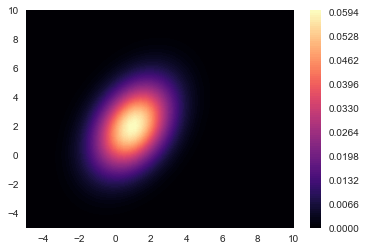

In [110]:
from scipy.linalg import cho_factor, cho_solve
d =2
mean = np.array([1, 2])[:, None]
cov = np.array([[2, 1], [1, 4]])
L = cho_factor(cov, lower=True)
diagL = np.diag(L[0])
detcov = np.prod(diagL) ** 2  #Sigma = LL^T ; Determinant of prod =  prod. of determinant.
Z = 1./np.sqrt(((2*np.pi)**2)*detcov)  #normalizing constant 

#define a grid over x 
x1 = np.linspace(-5, 10, 50)
X1, X2 = np.meshgrid(x1, x1)
Xgrid = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])[:, :, None]
Pdfs = np.array([Z*np.exp(-0.5*np.dot((xp-mean).T, cho_solve(L, xp-mean))) for xp in Xgrid])  ## See note below

## For those new to Python, the above line uses the concept of list comprehensions in Python. 
## See here: http://www.secnetix.de/olli/Python/list_comprehensions.hawk
## This is extremely useful for looping over simple expressions. 
## See also the map function: http://book.pythontips.com/en/latest/map_filter.html

#visualize the density
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()

Define a function ```mvnpdf``` which accepts an input $\mathbf{x}$ of any arbitrary dimension, $d$, and also accepts a mean vector and covariance matrix and returns the density of the normal distribution with given mean and covariance at point $\mathbf{x}$. Feel free to re-use any/all code from the example given above.

In [111]:
from scipy.linalg import cho_factor, cho_solve
def mvnpdf(d,mean,cov):
    mean= mean[:,None]
    L = cho_factor(cov, lower=True)
    diagL = np.diag(L[0])
    detcov = np.prod(diagL) ** 2  #Sigma = LL^T ; Determinant of prod =  prod. of determinant.
    Z = 1./np.sqrt(((2*np.pi)**d)*detcov)  #normalizing constant 
    x1 = np.linspace(-5, 10, 50)
    X1, X2 = np.meshgrid(x1, x1)
    Xgrid = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])[:, :, None]
    Pdfs = np.array([Z*np.exp(-0.5*np.dot((xp-mean).T, cho_solve(L, xp-mean))) for xp in Xgrid])
    return Pdfs

**Note: You can assume that the density is non-degenerate, i.e., the covariance matrix is positive definite.**

Let's test your implementation. Use ```numpy.random.randn``` and ```sklearn.datasets.make_spd_matrix```  to generate random mean vector and covariance matrix, $\mu$ and $\Sigma$ for a random variable in $2$ dimensions. Visualize the contours of the density function. Use ```scipy.stats.multivariate_normal``` to verify that you get the correct result. 

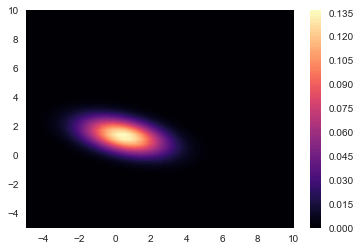

In [112]:
mean1= np.random.randn(2)
cov1 = make_spd_matrix(2,random_state=None)
pd= mvnpdf(2,mean1,cov1)
plt.contourf(X1, X2, pd.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()

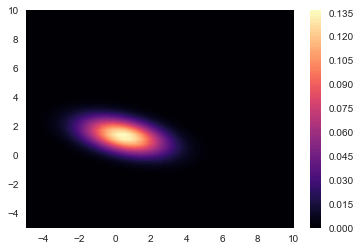

In [113]:
rv= st.multivariate_normal.pdf(Xgrid[:,:,0],mean1,cov1)
plt.contourf(X1, X2, rv.reshape((50,50)),100, cmap = "magma")
plt.colorbar()

### Sampling from a multivariate Gaussian

Recall that a univariate random variable, $\mathbf{q} \sim \mathcal{N}({\mathbf{q}|\mu, \sigma^2})$, can be expressed as $\mathbf{q} = \mu + \sigma \mathbf{z}$, where, $\mathbf{z} \sim \mathcal{N}({\mathbf{z}|0, 1})$ is a standard normal random variable. This suggests an easy approach for sampling from a univariate distribution with arbitrary mean and variance - Sample from the standard normal distribution $\mathcal{N}(0, 1)$, scale the result by standard deviation $\sigma$ and then translate by $\mu$.

The approach to sampling from a multivariate Gaussian is analogous to the univariate case. Here are the steps:
1. Compute  the Cholesky decomposition of the covariance matrix $\Sigma$ i.e. find $\mathbf{L}$ such that $\Sigma = \mathbf{L} \mathbf{L}^T$.
2. Sample a vector $\mathbf{z}$ from the multivariate standard normal in the given dimensions, i.e., $\mathcal{N}(\mathbf{0}_{d}, ,\mathbf{I}_{d\times d})$.
3. Scale and shift: $\mathbf{x} = \mu + \mathbf{L}\mathbf{z}$.

The code below samples from the MVN defined in the previous section of this question.

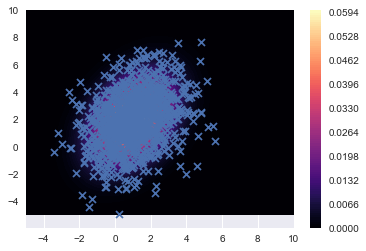

In [114]:
nsamples = 1000
samples = np.array([mean+np.dot(np.tril(L[0]), np.random.randn(2, 1)) for i in xrange(nsamples)])[:, :, 0]
x1 = samples[:,0]
x2 = samples[:,1]

#plot samples and compare to the pdf
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.scatter(x1, x2, marker='x')

Note that the generated samples look like they have been drawn from the MVN defined earlier. 

Define a function ```mvnsamples``` which accepts as input the mean vector and covariance matrix of a multivariate distribution of any arbitrary dimension, $d$, and returns $n$ samples from the distribution. $n$ is also to be passed as a parameter to the function.

In [115]:
def mvnsamples(x, mean, cov,n):
    d=np.size(x)
    nsamples = n
    ######
    mean= mean[:,None]
    L = cho_factor(cov, lower=True)
    diagL = np.diag(L[0])
    detcov = np.prod(diagL) ** 2  #Sigma = LL^T ; Determinant of prod =  prod. of determinant.
    Z = 1./np.sqrt(((2*np.pi)**d)*detcov)  #normalizing constant 
    x1 = np.linspace(-5, 10, 50)
    X1, X2 = np.meshgrid(x1, x1)
    Xgrid = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])[:, :, None]
    Pdfs = np.array([Z*np.exp(-0.5*np.dot((xp-mean).T, cho_solve(L, xp-mean))) for xp in Xgrid])
    #####
    samples = np.array([mean+np.dot(np.tril(L[0]), np.random.randn(d, 1)) for i in xrange(nsamples)])[:, :, 0]
    x1 = samples[:,0]
    x2 = samples[:,1]
    return x1, x2,Pdfs,X1,X2

Let's test your implementation. For the same mean and covariance generated earlier, draw $n$ samples and visualize it with a scatter plot. Make sure to compare the scatter plot with the density contours to verify your sampler is implemented correctly. 

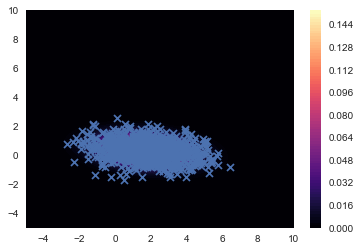

In [116]:
mean1= np.random.randn(2)
cov1 = make_spd_matrix(2,random_state=None)
x=np.random.randn(2,1)
[x1,x2,Pdfs,X1,X2]=mvnsamples(x ,mean1,cov1,1000)
plt.contourf(X1, X2, Pdfs.reshape((50, 50)), 100, cmap = 'magma')
plt.colorbar()
plt.scatter(x1, x2, marker='x')

# Problem 4 - Linear regression on noisy dataset

Consider the following dataset:

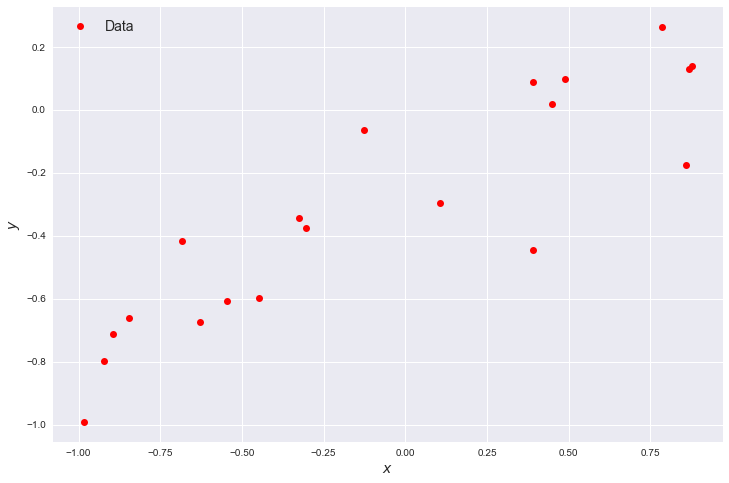

In [117]:
data =  np.loadtxt('hw3_data1.txt')
X = data[0, :][:,None]
Y = data[1, :]
plt.figure(figsize=(12, 8))
plt.plot(X, Y, 'ro', label = 'Data')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(loc='best', fontsize = 14)

We will try to fit the following linear regression model for this dataset: 
$$
f(x;\mathbf{w}) = w_0 + w_1 x,
$$
where, $w_0$ and $w_1$ are model  parameters. 

## Part A

### Bayesian linear regression (Part 1)

Consider the additive noise model:
$$
y = f(x;\mathbf{w}) + \epsilon = w_0 + w_1 x + \epsilon,
$$
where, $\epsilon \sim \mathcal{N}(\epsilon|0, \sigma^2)$.

Consider the following isotropic prior on the weights:
$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w}|0, \alpha^{-1}\mathbf{I}).
$$

The density function of multivariate Gaussians can be found [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). We will take a look at how to efficiently compute the density of multivariate Gaussians later in the course but for the time being let's use [scipy's implementation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) of the same to visualize the prior. 

Generate a grid of $w_0$ and $w_1$ values and use scipy's ```multivariate_normal.pdf``` method to compute the prior probability density at each location of the grid. Note that the prior mean and covariance are shown in the expression above. Show the contour plot of the prior pdf. If you aren't already familiar, check out [this tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html) on matplotlib contour plots.


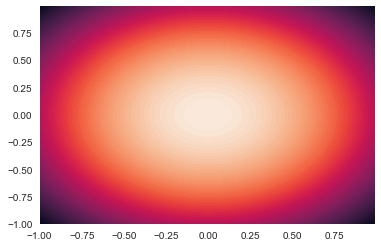

In [118]:
from scipy.stats import multivariate_normal
mean = np.array([0,0])
cov = np.array([[2, 0], [0, 2]])
w0, w1 = np.mgrid[-1:1:.01, -1:1:.01]
rv = multivariate_normal(mean, cov);

pos = np.empty(w0.shape + (2,))
pos[:, :, 0] = w0;
pos[:, :, 1] = w1
plt.contourf(w0, w1, rv.pdf(pos), 100)


Generate some samples of $\mathbf{w}$ from the prior and visualize the corresponding. You can use ```numpy.multivariate_normal```. An example using arbitrary mean and covariance  is shown below:

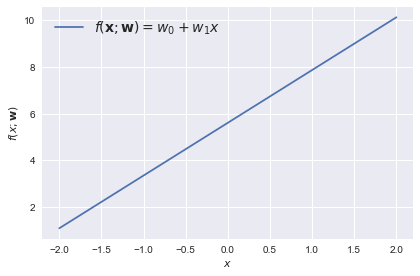

In [119]:
mean = np.array([1, 2])
cov = np.array([[2, 0], [0, 2]])
w_sample = np.random.multivariate_normal(mean = mean, cov = cov, size = 1)
w_0 = w_sample[0, 0]
w_1 = w_sample[0, 1]
x = np.linspace(-2, 2, 100)

plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = w_0 + w_1 x$')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)
plt.tight_layout()

**Note**: Please make sure all samples of $f$ are shown in the same plot. 

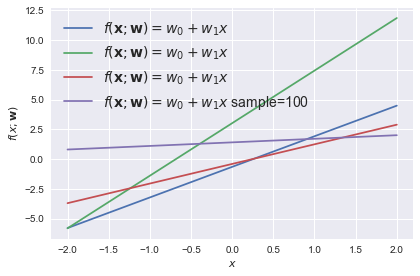

In [120]:
nsamples = 5 
w_sample = np.random.multivariate_normal(mean = mean, cov = cov, size = nsamples)
w_0 = w_sample[0, 0]
w_1 = w_sample[0, 1]
x = np.linspace(-2, 2, 100)

plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = w_0 + w_1 x$')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)

nsamples = 10 
w_sample = np.random.multivariate_normal(mean = mean, cov = cov, size = nsamples)
w_0 = w_sample[0, 0]
w_1 = w_sample[0, 1]
x = np.linspace(-2, 2, 100)

plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = w_0 + w_1 x$')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)

nsamples = 50 
w_sample = np.random.multivariate_normal(mean = mean, cov = cov, size = nsamples)
w_0 = w_sample[0, 0]
w_1 = w_sample[0, 1]
x = np.linspace(-2, 2, 100)

plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = w_0 + w_1 x$')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)

nsamples = 100 
w_sample = np.random.multivariate_normal(mean = mean, cov = cov, size = nsamples)
w_0 = w_sample[0, 0]
w_1 = w_sample[0, 1]
x = np.linspace(-2, 2, 100)

plt.plot(x, w_0 + w_1*x, label='$f(\mathbf{x};\mathbf{w}) = w_0 + w_1 x$ sample=100')
plt.xlabel('$x$')
plt.ylabel('$f(x;\mathbf{w})$')
plt.legend(loc='best', fontsize=14)
plt.tight_layout()

Define a function that accepts the prior precision $\alpha$ and the noise variance $\sigma^2$ and returns the posterior mean and covariance of $w$. 

In [15]:
import scipy.linalg
class LinearBasis(object):
    """
    Represents a 1D linear basis.
    """
    def __init__(self):
        self.num_basis = 2 # The number of basis functions
    def __call__(self, x):
        """
        ``x`` should be a 1D array.
        """
        return [1., x[0]]

def compute_design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs (1D array)
    phi -  The basis functions.
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.ndarray((num_observations, num_basis))
    for i in xrange(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

def postmeanvar(a, sigma2):
    phi = LinearBasis()
    Phi = compute_design_matrix(X, phi)
    A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
    L = scipy.linalg.cho_factor(A)
    w_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y))
    m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma2)  # The posterior mean of w
    S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
    return m,S

Visualize the posterior distribution over $w$ using scipy's ```multivariate_normal.pdf``` function. 

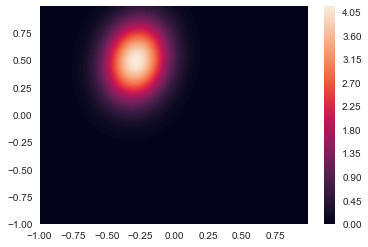

In [130]:
m,S = postmeanvar(0.05,0.5)
w0, w1 = np.mgrid[-1:1:.01, -1:1:.01]
post_dist = multivariate_normal(m, S);
fig, ax =plt.subplots()
plt.contourf(w0,w1,post_dist.pdf(pos),100)
plt.colorbar()

**How is the posterior different from the prior?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>
As we can see in the contour plot, w becomes narrower as compared to the prior. Hence posterior helps us to determine the w aproximately given the prior hyperparameters.As we can see in the contour plot, the mean is shifted in case of posterior. In case of prior mean is (0,0), but in case of posterior mean gets shifted.

Plot some samples from the posterior distribution:

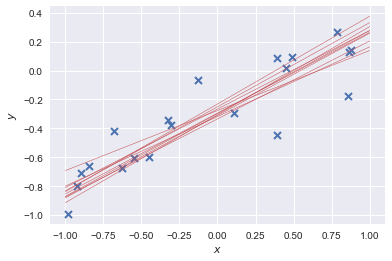

In [144]:
phi=LinearBasis()
Phi = compute_design_matrix(X, phi)
w_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y))
X_p = np.linspace(-1.,1.,10)[:, None]
Phi_p = compute_design_matrix(X_p, phi)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
for i in xrange(10):
    w = np.random.multivariate_normal(m, S)
    Y_p_s = np.dot(Phi_p, w)
    ax.plot(X_p, Y_p_s, color=sns.color_palette()[2], linewidth=0.5);
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Visualize the mean and variance of the posterior predictive distribution. Make sure to distinguish between 
measurement noise and epistemic uncertainty.

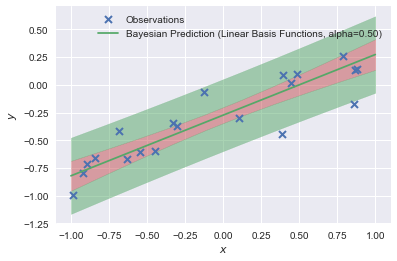

In [145]:
a=0.5
sigma2=0.025
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Linear Basis Functions, alpha=%1.2f)' % a)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

It is a good idea to set aside a part of your dataset for the purpose of testing the accuracy of your trained model. 
Consider the following test dataset:

In [146]:
testdata = np.loadtxt('hw3_data1_test.txt')
Xtest = testdata[0, :]
Ytest = testdata[1, :]

Make predictions on the test inputs, ```Xtest```, using the posterior predictive distribution under the Bayesian model. Compare it to the least squares predictions. Recall that the  least squares estimate of $\mathbf{w}$ is given by:
$$
\mathbf{w}_{\mathrm{LS}} = (\mathbf{\Phi}^T \mathbf{\Phi})^{-1} \mathbf{\Phi}^T y_{1:N}. 
$$
Use ```numpy.lstsq``` to obtain $\mathbf{w}_{\mathrm{LS}}$. The prediction at a new test location $x^*$ is given by $y^* = \mathbf{w}_{\mathrm{LS}, 0} + \mathbf{w}_{\mathrm{LS}, 1}x^*$.

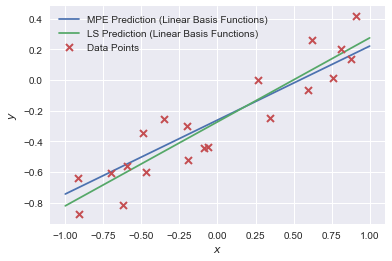

In [150]:
a=0.1
sigma2= 10
phi=LinearBasis()
X_pred = Xtest[:, None]
X_p=np.linspace(-1,1,100)[:,None]
Phi = compute_design_matrix(X_pred, phi)
#w_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, Ytest))
A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Ytest) / sigma2)  # The posterior mean of w
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
Phi_pred = compute_design_matrix(X_p, phi)
Ypred_bayes = np.dot(Phi_pred,m)
fig, ax = plt.subplots()
ax.plot(X_p, Ypred_bayes, '-', markeredgewidth=2, label='MPE Prediction (Linear Basis Functions)')
#ax.plot(X_p, Y_p, 'x',label='MPE Prediction (Linear Basis Functions, alpha=%1.2f)' % a)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
#plt.legend(loc='best');
Phis = compute_design_matrix(X_pred, phi)
w_LS = np.linalg.lstsq(Phis, Ytest)[0]
Phi_pred2 = compute_design_matrix(X_p, phi)
Ypred_Ls = np.dot(Phi_pred2, w_LS)

ax.plot(X_p, Ypred_Ls, '-', markeredgewidth=2, label='LS Prediction (Linear Basis Functions)')
ax.plot(Xtest, Ytest, 'x', markeredgewidth=2, label='Data Points')
plt.legend(loc='best');
#  Ypred_ls =  #least squares prediction.
#  Ypred_bayes =  #bayesian model prediction. 

**Which model (Bayesian or least squares) offers better predictions? Why do you think that is?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>
Why bayesian?<br>
1)Ordinary linear regression is a frequentist approach, and it assumes that there are enough measurements to say something meaningful. In the Bayesian approach, the data are supplemented with additional information in the form of a prior probability distribution. The prior belief about the parameters is combined with the data's likelihood function according to Bayes theorem to yield the posterior belief about the parameters.<br>
2)Bayesian models more ﬂexible, handles more complex models.<br>
3)Bayesian analysis more accurate in small samples (but then may depend on priors).<br>
4)Bayesian models can incorporate prior information

**In what situations (if any) would you expect simple least squares regression to perform better than the Bayesian regression?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>
Situation 1: When some of the data points do not lie far away from rest of the sample data, simple least squares performs better tha bayesian regression<br>
Situation 2: When computing large data, simple least sqaures requires less computation as compared to bayesian regression<br>
Situation 3: Since least square error do not require prior and minimize the squared error, it is better when doing linear models as compared to bayesian which require prior information


## Part C

### Evidence approximation

Picking the hyperparameters $\alpha$ and $\sigma^2$ is tricky. In theory, the fully approach to modeling the uncertainty in the hyperparameters is  simple - put  priors on them and make predictions on test data by marginalizing wrt to the hyperparameters and model weights. In practice, the resulting integrals are intractable. A popular and easy to implement approach to hyperparameter selection is [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). The idea is to choose a set of hyperparameter values, train the model at each value in the set and test it predictive accuracy. Finally, you select the values of the hyperparameters that offer the best predictive capacity.

A more systematic approach is to maximize the model evidence. The evidence is the marginal likelihood  of the data conditional on the hyperparameters, i.e., $p(y|x, \alpha, \sigma^2)$. 
Under the Gaussian likelihood and isotropic Gaussian prior model, the log evidence is given by:
$$
log p(y|x, \alpha, \beta) = \frac{M}{2} \log \alpha + \frac{N}{2} \log \beta - E(\mathbf{m}) -\frac{1}{2} \log \mathrm{det}(A) - \frac{N}{2} \log 2\pi,
$$
where, 
$\beta$ is the inverse noise variance (or precision), 

$$A = \alpha \mathbf{I} + \beta \Phi^T \Phi,$$ $$\mathbf{m} = \beta A^{-1} \Phi^T y_{1:N},$$

and $M$ is the number of model parameters, which in this case is 2. 

The term $E(\mathbf{m})$ is a regularized misfit term given by:
$$
E(\mathbf{m}) = \frac{\beta}{2} \| y_{1:N} - \Phi \mathbf{m} \|_{2}^{2} + \frac{\alpha}{2} \| \mathbf{m} \|_{2}^{2}.
$$

Set up a function ```evidence``` that accepts the prior precision, $\alpha$ and the inverse noise variance, $\beta$, and returns the value of the evidence function. Feel free to parameterize your implementation of the ```evidence``` in whatever way you see fit.

In [166]:
def evidence(inp_x):
    import scipy.linalg
    data5 =  np.loadtxt('hw3_data1.txt')
    XX = data5[0, :][:,None]
    YY = data5[1, :]
    alpha=inp_x[0]
    beta=inp_x[1]
    N=np.size(YY)
    phi = LinearBasis()
    Phi = compute_design_matrix(XX, phi)
    A = np.dot(Phi.T, Phi) * beta + alpha * np.eye(Phi.shape[1])
    L = scipy.linalg.cho_factor(A)
    m = scipy.linalg.cho_solve(L, np.dot(Phi.T, YY) * beta)
    S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
    Em= beta/2. * np.linalg.norm(YY-np.dot(Phi, m))**2 + alpha/2. * np.linalg.norm(m)**2
    EF= 1.0* np.log(alpha)+ N/2. * np.log(beta) - Em - 0.5 * np.log(np.linalg.det(S))- N/2. * np.log(2 * np.pi)
    return -EF

Use a suitable second order unconstrained optimization routine from ```scipy.optimize``` to minimize the **negative log evidence**. A popular method is the [BFGS algorithm.](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html). Be sure to read the documentation carefully.

In [172]:
inp_x=[0.05,1]
opt= scipy.optimize.minimize(evidence, inp_x, method='BFGS')
print opt
# Set up the optimization routine and minimize the negative log evidence. 
#

      fun: -15.239955518577588
 hess_inv: array([[  40.33801558,   -5.20481127],
       [  -5.20481127,  156.60162122]])
      jac: array([  2.38418579e-06,   1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 24
     njev: 25
   status: 0
  success: True
        x: array([  6.45383129,  42.24304163])


Use the estimates of the hyperparameters obtained by maximizing the evidence to recompute the posterior mean and variance of the model parameters under the constant prior precision and likelihood variance model. 

In [179]:
alpha=opt.x[0]
beta=opt.x[1]
data5 =  np.loadtxt('hw3_data1.txt')
XX = data5[0, :][:,None]
YY = data5[1, :]
alpha=inp_x[0]
beta=inp_x[1]
N=np.size(YY)
phi = LinearBasis()
Phi = compute_design_matrix(XX, phi)
A = np.dot(Phi.T, Phi) * beta + alpha * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, YY) * beta)
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
print "mean and variance after epistemic approximation:",m,S

# previous
a=0.1
sigma2= 10
phi=LinearBasis()
X_pred = Xtest[:, None]
X_p=np.linspace(-1,1,100)[:,None]
Phi = compute_design_matrix(X_pred, phi)
#w_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, Ytest))
A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Ytest) / sigma2)  # The posterior mean of w
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
Phi_pred = compute_design_matrix(X_p, phi)
Ypred_bayes = np.dot(Phi_pred,m)
print "mean and variance before epistemic approximation:",m,S

mean and variance after epistemic approximation: [-0.28369182  0.48929272] [[ 0.05053609  0.00883003]
 [ 0.00883003  0.11799691]]
mean and variance before epistemic approximation: [-0.26169337  0.48249527] [[ 0.47662911  0.02298032]
 [ 0.02298032  1.20395803]]


**Does this differ from your earlier estimate of the posterior mean and variance?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>
Yes, it differs from the earlier estimate of the posterior mean and variance.Values are as show above.

**Visualize the following:** 
1.  The posterior density of $\mathbf{w}$.
2.  A few models sampled from the posterior. 
3.  The posterior predictive distribution  with noise variance and epistemic uncertainty.

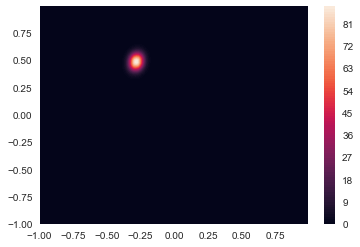

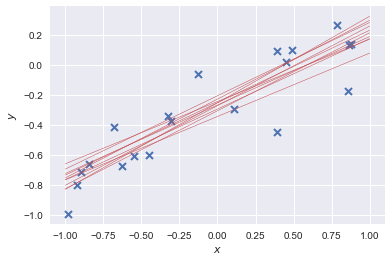

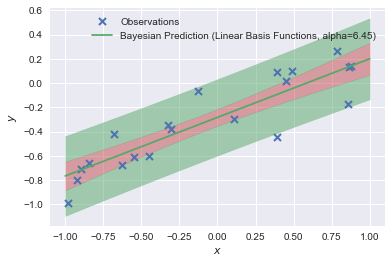

In [184]:
m,S = postmeanvar(6.45383129,  1/42.24304163) #values of alpha and beta obtained after evidence approximation
w0, w1 = np.mgrid[-1:1:.01, -1:1:.01]
post_dist = multivariate_normal(m, S);
fig, ax =plt.subplots()
plt.contourf(w0,w1,post_dist.pdf(pos),100)
plt.colorbar()

phi=LinearBasis()
Phi = compute_design_matrix(X, phi)
w_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y))
X_p = np.linspace(-1.,1.,10)[:, None]
Phi_p = compute_design_matrix(X_p, phi)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
for i in xrange(10):
    w = np.random.multivariate_normal(m,S)
    Y_p_s = np.dot(Phi_p, w)
    ax.plot(X_p, Y_p_s, color=sns.color_palette()[2], linewidth=0.5);
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

a=6.45383129
sigma2=1/42.24304163
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Linear Basis Functions, alpha=%1.2f)' % a)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');



Finally, use the model you just trained to make predictions on the  test data:

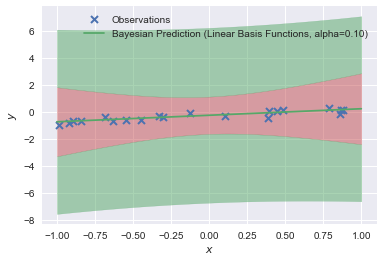

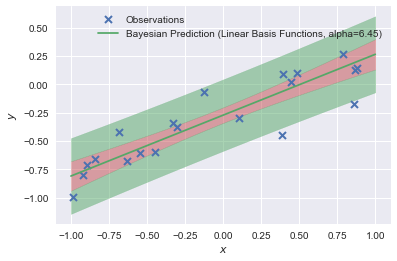

In [186]:
testdata = np.loadtxt('hw3_data1_test.txt')
Xtest = testdata[0, :]
Ytest = testdata[1, :]

a=0.1
sigma2= 10
phi=LinearBasis()
X_pred = Xtest[:, None]
X_p=np.linspace(-1,1,100)[:,None]
Phi = compute_design_matrix(X_pred, phi)
#w_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, Ytest))
A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Ytest) / sigma2)  # The posterior mean of w
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Linear Basis Functions, alpha=%1.2f)' % a)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

a=6.45383129
sigma2=1/42.24304163
phi=LinearBasis()
X_pred = Xtest[:, None]
X_p=np.linspace(-1,1,100)[:,None]
Phi = compute_design_matrix(X_pred, phi)
#w_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, Ytest))
A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Ytest) / sigma2)  # The posterior mean of w
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Linear Basis Functions, alpha=%1.2f)' % a)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

**How do the predictions compare to the previous versions?**

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br>
As we can see in the above graph that after estimating the hyper parameters by evidence approximation, correct epistemic and aleatory uncertainity is obtained. In the previous graph, aleatory uncertainity is large as compared to epistemic uncertainity. But after estimated the hyperparameters, model captures both uncertainities correctly.

# Problem 5

### Bayesian linear regression  (Part 2)

We will now look at a somewhat more complicated example. The following dataset was generated using a molecular dynamics simulation of a plastic material (thanks to [Professor Alejandro Strachan](https://engineering.purdue.edu/MSE/people/ptProfile?id=33239) for sharing the data!).
In particular, we took a rectangular chunk of the material and we started applying tensile forces along one dimension.
What you see in the data set below is the instantaneous measurements of *strain* (percent enlogation of the material in the pulling direction) vs the normal *stress* (force per square area in MPa = $10^6 \text{N}/m^2$).
This [video](https://youtu.be/K6vOkQ5F9r0) will help you understand how the dataset was generated.

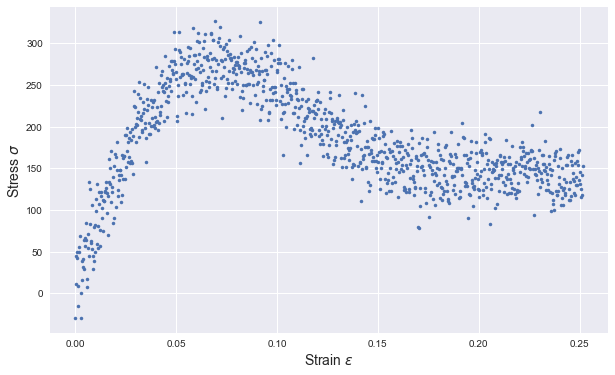

In [71]:
data = np.loadtxt('stress_strain.txt')
epsilon = data[:, 0]
sigma_5 = data[:, 1]
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(epsilon, sigma, '.')
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)

This is a noisy dataset.
We would like to process it in order to extract what is known as the [stress-strain curve](https://en.wikipedia.org/wiki/Stress–strain_curve) of the material.
The stress-strain curve characterizes the type of the material (the chemical bonds, the crystaline structure, any defects, etc.).
It is a required input to the equations of [elasticity](https://en.wikipedia.org/wiki/Elasticity_(physics)) otherwise known as a *constitutive relation*.

### Part A
The very first part of the stress-strain curve is very close to being linear.
It is called the *elastic regime*.
In that region, say $\epsilon < \epsilon_l=0.04$, the relationship between stress and strain is:
$$
\sigma(\epsilon) = E\epsilon.
$$
The constant $E$ is known as the *Young modulus* of the material.
Use a generalized linear model and Bayesian linear regression to:
+ Compute the posterior of $E$ given the data;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve in the elastic regime;
+ Take five plaussible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

In [96]:
# enter code here.
class LinearBasis1(object):
    """
    Represents a 1D linear basis.
    """
    def __init__(self):
        self.num_basis = 1 # The number of basis functions
    def __call__(self, x):
        """
        ``x`` should be a 1D array.
        """
        return [x[0]]

In [97]:

Xt = epsilon[np.where(epsilon>0.04)]
Yt = sigma_5[np.where(epsilon>0.04)]
#Phi = compute_design_matrix(X [:,None], phi)
#print Xn.shape, Yn.shape

from sklearn.linear_model import ARDRegression
phi = LinearBasis1()
Phi = compute_design_matrix(Xt[:, None], phi)
regressor = ARDRegression()
regressor.fit(Phi, Yt)
# They are using different names:
sigma_l = np.sqrt(1. / regressor.alpha_)
print 'best sigma:', sigma_l
alpha = regressor.lambda_
print 'best alpha:', alpha


best sigma: 30.5944231914
best alpha: [  1.64760674e-06]


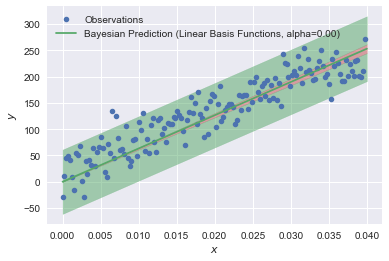

In [98]:
# enter code here.
class LinearBasis1(object):
    """
    Represents a 1D linear basis.
    """
    def __init__(self):
        self.num_basis = 1 # The number of basis functions
    def __call__(self, x):
        """
        ``x`` should be a 1D array.
        """
        return [x[0]]

phi= LinearBasis1()
a=1.64760674e-06
sigma2=(sigma_l)**2
epsi_l=epsilon[np.where(epsilon<0.04)]
epsi= epsilon[np.where(epsilon<0.04)][:,None]
sig = sigma_5[np.where(epsilon<0.04)]
Phi = compute_design_matrix(epsi, phi)
A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
E_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig))
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig) / sigma2)  # The posterior mean of E
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
X_p=np.linspace(0,0.04,100)
Phi_p = compute_design_matrix(X_p[:,None], phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(epsi, sig, '.', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Linear Basis Functions, alpha=%1.2f)' % a)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

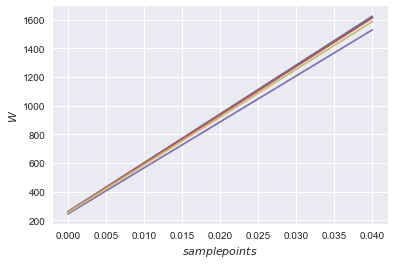

In [100]:
nsamples =5;
x_sampleplot = np.linspace(0.0, 0.04, 100)
yield_strength=np.zeros(nsamples)

for i in xrange(nsamples):
    w = np.random.multivariate_normal(m, S)
    w_12 = w[0]*x_sampleplots
    plt.plot( x_sampleplot,w_12)
    plt.xlabel('$sample points$')
    plt.ylabel('$W$')
    plt.legend(loc='best', fontsize=14) 


### Part B
Now, come up with a generalized linear model that can capture the non-linear part of the stress-strain relation.
Remember, you can use any model you want as soon as:
+ it is linear in the parameters to be estimated,
+ it clearly has a well-defined elastic regime (see Part A).

Use your model to:
+ Derive, compute, and visualize a probabilistic estimate of the peak of the stress-strain curve (the so-called *yield stress*). This is not necessarily going to be Gaussian or even analytically available;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve.
+ Take five plaussible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

*Hint: You can use the Heavide step function to turn on or off models for various ranges of $\epsilon$. The idea is quite simple. Here is a model that has the right form in the elastic regime and an arbitrary form in the non-linear regime:*
$$
f(\epsilon) = E\epsilon \left[(1 - H(\epsilon - \epsilon_l)\right] + g(\epsilon;\mathbf{w}_g)H(\epsilon - \epsilon_l),
$$
where
$$
H(x) = \begin{cases}
0,\;\text{if}\;x < 0\\
1,\;\text{otherwise}.
\end{cases}
$$

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>

In [87]:
# Implementation of the basis functions
class PolyBasis(object):
    """
    Represents a 1D linear basis.
    """      
    def __init__(self):
        #self.w=w
        #self.epi=epi
        self.num_basis = 4 # The number of basis functions
    def __call__(self, x):
        """
        ``x`` should be a 1D array.
        """
       #return [self.epi*self.w, (self.w*x[0])/(self.w+x[0])]
        return [1.0 , x[0],x[0]**2,x[0]**3]

In [90]:
Xt = epsilon[np.where(epsilon>0.04)]
Yt = sigma_5[np.where(epsilon>0.04)]

from sklearn.linear_model import ARDRegression
phi = PolyBasis()
Phi = compute_design_matrix(Xt[:, None], phi)
regressor = ARDRegression()
regressor.fit(Phi, Yt)
# They are using different names:
sigma_nl = np.sqrt(1. / regressor.alpha_)
print 'best sigma:', sigma_nl
alpha_nl = regressor.lambda_
print 'best alpha:', alpha_nl


best sigma: 26.1689566905
best alpha: [  1.00000000e+00   1.77065575e-07   1.30614165e-09   2.05506679e-10]


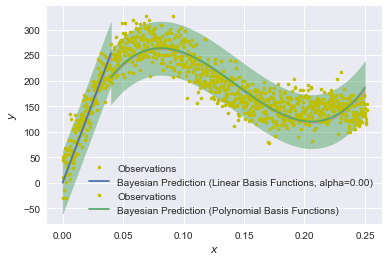

In [91]:
phi= LinearBasis1()
a=1.64760674e-06
sigma2=(sigma_l)**2
epsi_l=epsilon[np.where(epsilon<0.04)]
epsi= epsilon[np.where(epsilon<0.04)][:,None]
sig = sigma[np.where(epsilon<0.04)]
Phi = compute_design_matrix(epsi, phi)
A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
E_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig))
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig) / sigma2)  # The posterior mean of E
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
w_l=np.random.multivariate_normal(m,S)
X_p=np.linspace(0,0.04,100)
Phi_p = compute_design_matrix(X_p[:,None], phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(epsi, sig, 'y.', markeredgewidth=0.01, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Linear Basis Functions, alpha=%1.2f)' % a)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

####
phi= PolyBasis()
a=alpha_nl
sigma2=(sigma_nl)**2
epsi_l=epsilon[np.where(epsilon>=0.04)]
epsi= epsilon[np.where(epsilon>=0.04)][:,None]
sig = sigma[np.where(epsilon>=0.04)]
Phi = compute_design_matrix(epsi, phi)
A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
E_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig))
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig) / sigma2)  # The posterior mean of E
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
w_nm=np.random.multivariate_normal(m,S)
X_p=np.linspace(0.04,0.25,100)
Phi_p = compute_design_matrix(X_p[:,None], phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound
#fig, ax = plt.subplots()
ax.plot(epsi, sig, 'y.', markeredgewidth=0.01, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Polynomial Basis Functions)')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

Let us assume that maximum of yield stress lie in the non linear part of the stress starin curve. Hence from the above graph we can say that maximum of yield stress is around $ 250*10^6 N/m^2 $

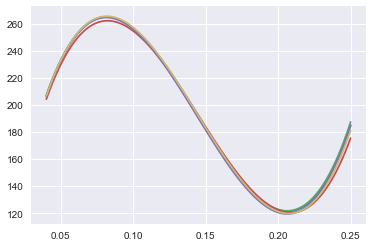

In [95]:
nsamples =5;
x_sampleplots = np.linspace(0.04, 0.25, 100)
yield_strength=np.zeros(nsamples)

for i in xrange(nsamples):
    w = np.random.multivariate_normal(m, S)
    w_1 = w[0]+w[1]*x_sampleplots+w[2]*x_sampleplots**2+w[3]*x_sampleplots**3
    plt.plot( x_sampleplots,w_1)
    plt.xlabel('$sample points$')
    plt.ylabel('$W$')
    plt.legend(loc='best', fontsize=14) 


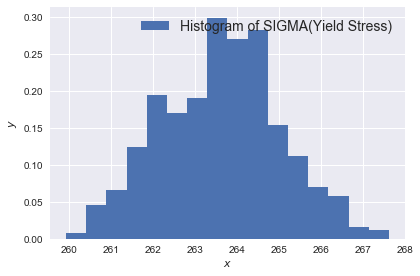

In [92]:
nsamples =500;
x_sampleplots = np.linspace(0.04, 0.25, 100)
yield_strength=np.zeros(nsamples)

for i in xrange(nsamples):
    w = np.random.multivariate_normal(m, S)
    w_1 = w[0]+w[1]*x_sampleplots+w[2]*x_sampleplots**2+w[3]*x_sampleplots**3
    yield_strength[i-1]=np.max(w_1)

fig ,ax=plt.subplots()   
plt.hist( yield_strength, bins='auto',normed=1,label='Histogram of SIGMA(Yield Stress)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best', fontsize=14)
plt.tight_layout()

In [79]:
# Implementation of the basis functions
class NonLinear2(object):
    """
    Represents a 1D linear basis.
    """      
    def __init__(self,epi,w,w2,w3):
   # def __init__(self,yieldstr):
        self.w=w
        self.epi=epi
        self.w2=w2
        self.w3=w3
        self.num_basis = 4 # The number of basis functions
    def __call__(self, x):
        """
        ``x`` should be a 1D array.
        """
        return [self.w*self.epi-self.w2*self.epi**2-self.w3*self.epi**3-(self.w-2*self.w2*self.epi-3*self.w3*self.epi**2)*self.epi,(self.w-2*self.w2*self.epi-3*self.w3*self.epi**2)*x[0],x[0]**2,x[0]**3]


### Part C

The model you constructed in part B may have a disctontinuity at $\epsilon=\epsilon_l$.
How can you enforce continuity of $\sigma(\epsilon)$ and its first derivative at that point?
Can you reparameterize the model of part B, so that this condition is automatically satisfied?
If yes, then repeat the analysis of part B.

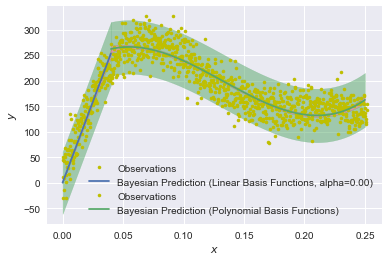

In [86]:
phi= LinearBasis1()
a=1.64760674e-06
sigma2=(sigma_l)**2
epsi_l=epsilon[np.where(epsilon<0.04)]
epsi= epsilon[np.where(epsilon<0.04)][:,None]
sig = sigma_5[np.where(epsilon<0.04)]
Phi = compute_design_matrix(epsi, phi)
A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
E_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig))
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig) / sigma2)  # The posterior mean of E
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
w_l=np.random.multivariate_normal(m,S)
X_p=np.linspace(0,0.04,100)
Phi_p = compute_design_matrix(X_p[:,None], phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(epsi, sig, 'y.', markeredgewidth=0.01, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Linear Basis Functions, alpha=%1.2f)' % a)
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');


phi= NonLinear2(0.04,w_l[0],w_nm[2],w_nm[3])
a=alpha_nl
sigma2=(sigma_nl)**2
epsi_l=epsilon[np.where(epsilon>=0.04)]
epsi= epsilon[np.where(epsilon>=0.04)][:,None]
sig = sigma_5[np.where(epsilon>=0.04)]
Phi = compute_design_matrix(epsi, phi)
A = np.dot(Phi.T, Phi) / sigma2 + a * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
E_MPE = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig))
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, sig) / sigma2)  # The posterior mean of E
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))
#w_nm=np.random.multivariate_normal(m,S)
X_p=np.linspace(0.04,0.25,100)
Phi_p = compute_design_matrix(X_p[:,None], phi)
Y_p = np.dot(Phi_p, m) # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound
#fig, ax = plt.subplots()
ax.plot(epsi, sig, 'y.', markeredgewidth=0.01, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (Polynomial Basis Functions)')
ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color=sns.color_palette()[2], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color=sns.color_palette()[1], alpha=0.5)
ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color=sns.color_palette()[1], alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br>

-End-